In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,SPQ_TOTAL_ESQUIZOT
0,17,5,0,7,5,13,2,20,0,24,4,0
1,13,11,3,6,11,17,11,17,1,22,9,0
2,20,20,20,11,8,3,0,20,1,30,12,1
3,12,1,0,4,6,3,1,18,0,20,4,0
4,8,9,17,4,14,2,6,27,17,35,17,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 80% de los datos para entrenamiento y un 20% de los datos para validación
valid_idx  =  range ( len ( df ) - 57 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['SCL90_IDEA_PARAN', 'CSI_RESPROBL', 'TRAUMA_FRECUENCIA', 'CAPE_POSIT_FREC', 'ANSIEDADRASGO', 'CSI_PENSDESID', 'CSI_REESTCOGN', 'CSI_EVITPROBL', 'CSI_RETISOC', 'CSI_AUTOCRIT', 'CSI_APOYOSOC']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.70646   1.083407  0.010695  0.323077 ... -0.328163 -1.250074  0.654704  1.605586]
 [ 2.375051  0.882354 -0.742891 -0.155272 ...  1.192199  0.436329  0.308851  0.598706]
 [ 0.063918 -0.323969  0.481686 -0.474171 ... -0.545358  0.225529  0.654704  0.934333]
 [-0.70646  -0.525022 -0.177701 -0.474171 ... -0.762552 -0.828473 -1.247486 -0.072548]
 [-0.513865  1.284461  0.29329  -0.314721 ... -1.414136  2.333533  2.211041  1.7734  ]]
[0 1 1 0 0]


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.984121,0.998023,0.649123,02:36
1,0.863868,0.949560,0.614035,02:34
2,0.767117,0.920181,0.649123,03:09
3,0.704142,0.890970,0.649123,03:15
4,0.656154,0.883521,0.666667,02:34
5,0.622616,0.885634,0.719298,02:50
6,0.580941,0.869740,0.701754,02:50
7,0.544173,0.883320,0.684211,02:51
8,0.512712,0.911069,0.684211,02:53
9,0.485700,0.945483,0.684211,02:57


SCL90_IDEA_PARAN,CSI_RESPROBL,TRAUMA_FRECUENCIA,CAPE_POSIT_FREC,ANSIEDADRASGO,CSI_PENSDESID,CSI_REESTCOGN,CSI_EVITPROBL,CSI_RETISOC,CSI_AUTOCRIT,CSI_APOYOSOC,target,prediction
1.0269,-0.3240,0.2933,0.6420,-0.1457,-0.7051,-0.2256,-0.3282,-0.1961,0.6547,-1.0794,1,0
-0.3213,-0.9271,0.1049,-0.3147,-0.1457,-1.2034,-0.5934,-0.7626,-1.0393,-0.9016,-0.9116,0,0
-0.8991,-0.5250,-1.2139,-1.1120,-4.0316,-0.3729,0.1421,0.7578,0.6471,0.8276,0.0953,1,0
-0.7065,-0.5250,0.0107,-0.7931,-0.1457,-0.2067,-0.7772,-0.1110,0.0147,0.3089,-0.2404,0,0
0.8343,0.0781,-0.6487,0.4825,0.6639,1.2883,-1.3288,-1.1969,0.2255,0.1359,-0.4082,1,1


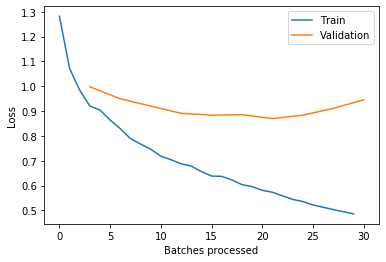

In [10]:
learn.recorder.plot_losses()
learn.show_results()